## Introduction

***This project aims to build a machine learning model trained on this dataset to predict new unseen data. We will use NLP Basic Concepts like Text Preprocessing Step and Vectorization types .
The Language Detection falls basically into Text Classification part.***

## About the dataset


***Dataset is collected from Kaggle, which contains data about 17 popular languages and contains 1000 sentences in each of the languages***

**Languages are**
* English
* Portuguese
* French
* Greek
* Dutch
* Spanish
* Japanese
* Russian
* Danish
* Italian
* Turkish
* Swedish
* Arabic
* Malayalam
* Hindi
* Tamil
* Telugu

####  Importing Basic Libraries and the Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

#### Show Top 5 rows of dataframe

In [2]:
df = pd.read_csv('./data/lang_detection.csv')
df.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


####  Understanding the Dataset

In [3]:
df.shape

(10337, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10337 entries, 0 to 10336
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      10337 non-null  object
 1   Language  10337 non-null  object
dtypes: object(2)
memory usage: 161.6+ KB


In [5]:
df.isnull().sum()

Text        0
Language    0
dtype: int64

In [6]:
df[df.duplicated()]

,Text,Language
1141,i'm sorry.,English
1180,oh my god.,English
1196,i'm sorry.,English
1724,എന്നോട് ക്ഷമിക്കൂ.,Malayalam
1767,ഓ എന്റെ ദൈവമേ.,Malayalam
...,...,...
9706,Ach du lieber Gott.,German
9726,Es tut mir Leid.,German
10081,ನನ್ನನ್ನು ಕ್ಷಮಿಸು.,Kannada
10125,ಓ ದೇವರೇ.,Kannada


#### There are 66 duplicate rows, SO we will drop them

In [7]:
df.drop(df[df.duplicated()].index, axis=0, inplace=True)
df.shape

(10271, 2)

#### Dataset contains texts from 17 different languages

In [8]:
df['Language'].nunique()

17

#### How many rows belong to each language?

In [9]:
df['Language'].value_counts()

English       1382
French        1007
Spanish        816
Portugeese     736
Italian        694
Russian        688
Sweedish       673
Malayalam      591
Dutch          542
Arabic         532
Turkish        471
German         465
Tamil          464
Danish         424
Kannada        366
Greek          358
Hindi           62
Name: Language, dtype: int64

#### How is distribution of different Languages?

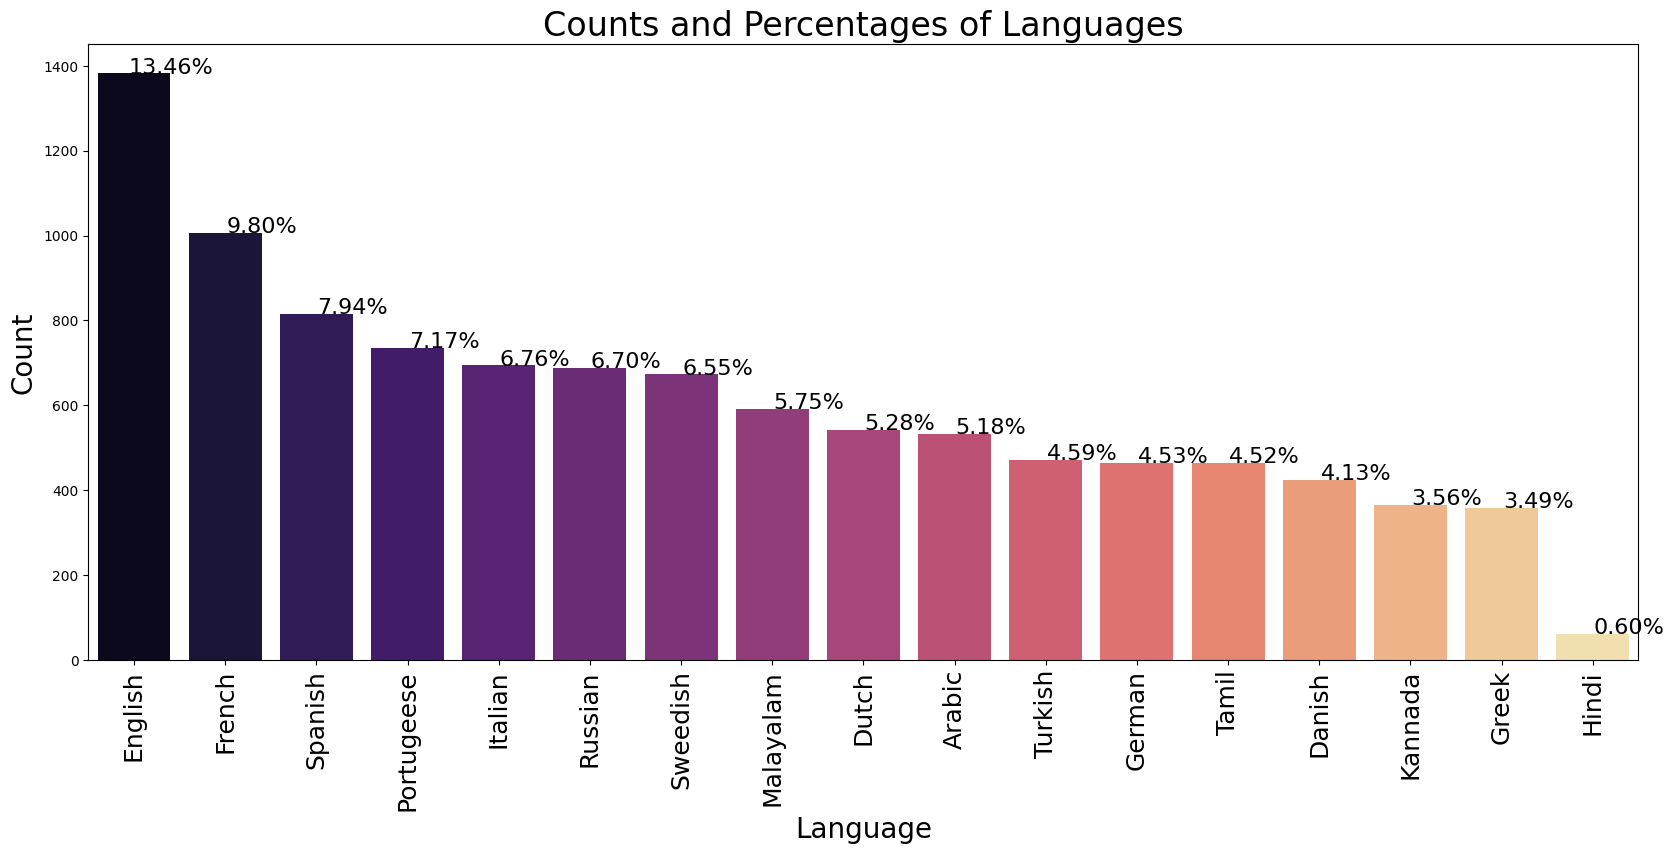

In [10]:
plt.figure(figsize=(20,8))

total= float(len(df['Language']))
ax= sns.countplot(x= 'Language', data= df, order= df['Language'].value_counts().index, palette= 'magma')

for p in ax.patches:
    percentage= '{:.2f}%'.format(100 * p.get_height()/total)
    x= p.get_x() + p.get_width()
    y= p.get_height()
    ax.annotate(percentage, (x, y), fontsize=16, ha='center')
    
plt.title('Counts and Percentages of Languages', fontsize=24)
plt.xlabel("Language",fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.xticks(size= 18, rotation=90) 
plt.show()

In [11]:
language= df['Language'].value_counts().reset_index()
language

,index,Language
0,English,1382
1,French,1007
2,Spanish,816
3,Portugeese,736
4,Italian,694
5,Russian,688
6,Sweedish,673
7,Malayalam,591
8,Dutch,542
9,Arabic,532


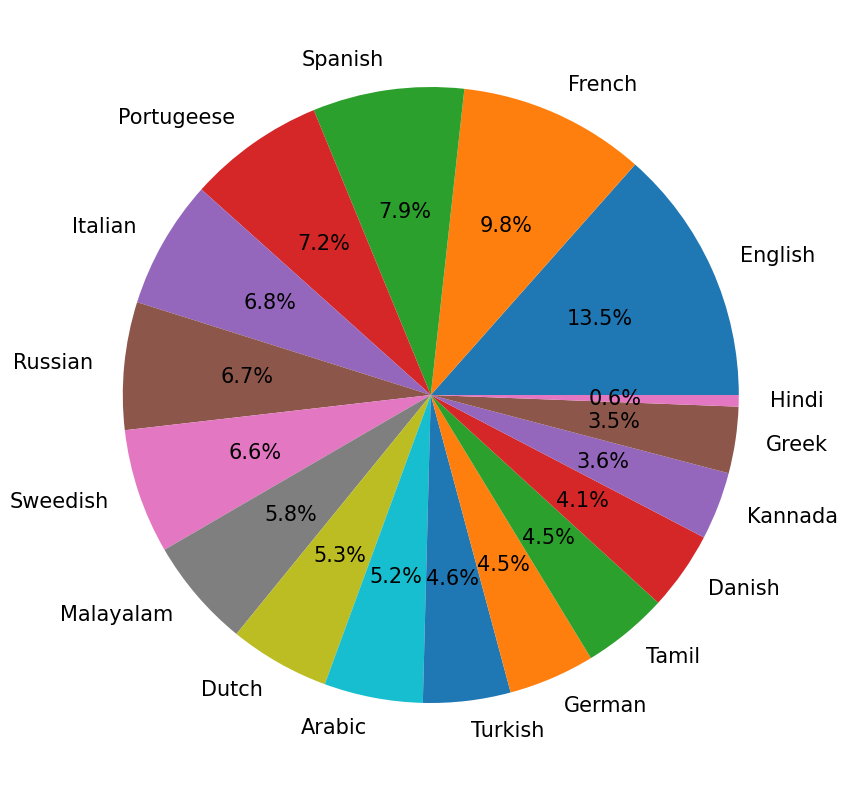

In [12]:
plt.figure(figsize=(10,10))

#create pie chart
labels= language['index']

plt.pie(language["Language"], labels= labels, autopct='%.1f%%', textprops={'fontsize': 15})

plt.show()

#### Text Preprocessing Steps
```
for char in string.punctuation:
    print(char, end = ' ')
translate_table = dict((ord(char), None) for char in string.punctuation)

Output: 
! " # $ % & ' ( ) * + , - . / : ; < = > ? @ [ \ ] ^ _ ` { | } ~ 
```
Text Pre-Processing basically involves.
- **Tokenization** : Splitting the sentences into words are basically called as tokenization. The words here are called tokens.

- **Stopwords removal** : Stopwords are nothing but these are frequently occuring words and it does not add any information to the model. For example : is,the,prepositions and article words.
- **Lower case conversion** : The necessity of converting all the words into lower case is that (for ex: Mumbai,MUMBAI,mumbai) the meaning of the word is same but our model will detect them as 3 different words. To avoid this confusion we convert all the sentences and words into lower case.
- **Removing numeric / digits** : Having numbers into our sentences dosent make any sence to our model it will just add up the number of features 
- **Removing Punctuation / Special characters** : Same as numeric values it dosent add any value to our model.
- **Removing characters for foreign languages** : If you want to identify the languages like chinese and japanese and you want to make your model to understand these languages in this case you can also remove the character(only for the foreign languages).
- **Normalization** : The words can be be written into different formats (USA, U.S.A, usa) we need to convert these into one format. 
- **Stemming & Lemmatization** : This is the most important step to perform. In this we are cutting the words either we are bringing the word to its original /root form or we are cutting the word into it form and int from.

In [13]:
df1= df.copy()
df1['cleaned_Text']= ""
df1

,Text,Language,cleaned_Text
0,"Nature, in the broadest sense, is the natural...",English,
1,"""Nature"" can refer to the phenomena of the phy...",English,
2,"The study of nature is a large, if not the onl...",English,
3,"Although humans are part of nature, human acti...",English,
4,[1] The word nature is borrowed from the Old F...,English,
...,...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada,
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada,
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada,
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada,


In [14]:
import re
def clean_function(Text):
    # removing the symbols and numbers
    Text = re.sub(r'[\([{})\]!@#$,"%^*?:;~`0-9]', ' ', Text)
    
    # converting the text to lower case
    Text = Text.lower()
    Text = re.sub('http\S+\s*', ' ', Text)  # remove URLs
    Text = re.sub('RT|cc', ' ', Text)  # remove RT and cc
    Text = re.sub('#\S+', '', Text)  # remove hashtags
    Text = re.sub('@\S+', '  ', Text)  # remove mentions
    Text = re.sub('\s+', ' ', Text)  # remove extra whitespace
    
    return Text

#### Transforming the dataset into single dataset

In [15]:
df1['cleaned_Text'] = df1['Text'].apply(lambda x: clean_function(x))
df1

,Text,Language,cleaned_Text
0,"Nature, in the broadest sense, is the natural...",English,nature in the broadest sense is the natural p...
1,"""Nature"" can refer to the phenomena of the phy...",English,nature can refer to the phenomena of the phys...
2,"The study of nature is a large, if not the onl...",English,the study of nature is a large if not the only...
3,"Although humans are part of nature, human acti...",English,although humans are part of nature human activ...
4,[1] The word nature is borrowed from the Old F...,English,the word nature is borrowed from the old fren...
...,...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...


#### Separating Independent and Dependent Features

In [16]:
X= df1["cleaned_Text"]
y= df1["Language"]

#### Label Encoding

In [17]:
from sklearn.preprocessing import LabelEncoder

encoder= LabelEncoder()

y= encoder.fit_transform(y)

In [18]:
encoder.classes_

array(['Arabic', 'Danish', 'Dutch', 'English', 'French', 'German',
       'Greek', 'Hindi', 'Italian', 'Kannada', 'Malayalam', 'Portugeese',
       'Russian', 'Spanish', 'Sweedish', 'Tamil', 'Turkish'], dtype=object)

In [43]:
y

array([3, 3, 3, ..., 9, 9, 9])

#### Text Vectorization

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
TF_IDF= TfidfVectorizer(ngram_range=(1,3), analyzer='char')
X= TF_IDF.fit_transform(X).toarray()
X.shape

(10271, 57905)

In [39]:
TF_IDF

TfidfVectorizer(analyzer='char', ngram_range=(1, 3))

In [21]:
X

array([[0.22227828, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.26153035, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.2556637 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.10358589, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.09374295, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.09804961, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

#### Splitting Train and Test Data

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=42)

#### Building Model and Training

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

In [24]:
models = {
    'K-Nearest Neighbors' : KNeighborsClassifier(),
    'Random Forest' : RandomForestClassifier(),
    'MNB' : MultinomialNB()    
}

In [25]:
%%time
for name, model in models.items():
    print(f'{name} training started...')
    model.fit(X_train, y_train)
    print(f'{name} trained')

K-Nearest Neighbors training started...
K-Nearest Neighbors trained
Random Forest training started...
Random Forest trained
MNB training started...
MNB trained
CPU times: total: 1min 5s
Wall time: 1min 8s


In [26]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix as CM
from sklearn.metrics import classification_report

In [27]:
%%time
for name in models:
    acc_score= round(accuracy_score(y_test, models.get(name).predict(X_test)), 3)
    print(f'{name} accuracy score :  {acc_score}')

K-Nearest Neighbors accuracy score :  0.975
Random Forest accuracy score :  0.973
MNB accuracy score :  0.844
CPU times: total: 3min 12s
Wall time: 17.4 s


In [28]:
for name in models:
    print(f'{name} classification report')
    print("-------------------------------")
    print(classification_report(y_test, models.get(name).predict(X_test)))
    print("******************************")
    print(" ")

K-Nearest Neighbors classification report
-------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       146
           1       0.88      0.99      0.93       103
           2       0.95      0.96      0.96       133
           3       0.98      0.98      0.98       361
           4       0.99      0.97      0.98       255
           5       0.98      0.96      0.97       114
           6       1.00      1.00      1.00        79
           7       1.00      1.00      1.00        12
           8       0.91      0.98      0.95       159
           9       1.00      1.00      1.00        86
          10       1.00      1.00      1.00       161
          11       0.95      0.93      0.94       178
          12       1.00      1.00      1.00       150
          13       0.97      0.93      0.95       205
          14       0.99      0.95      0.97       182
          15       1.00      1.00      1.00       111
       

K-Nearest Neighbors ConfusionMatrix


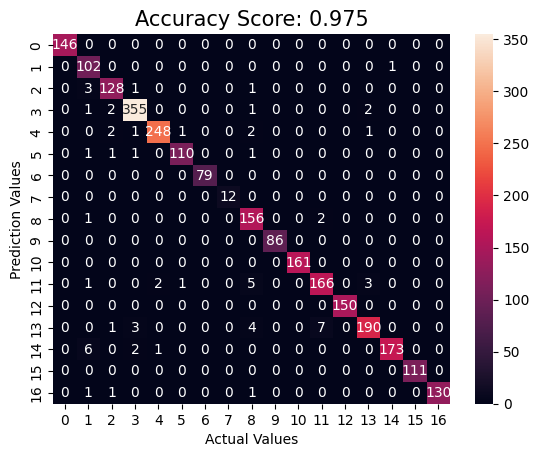

******************************
 
Random Forest ConfusionMatrix


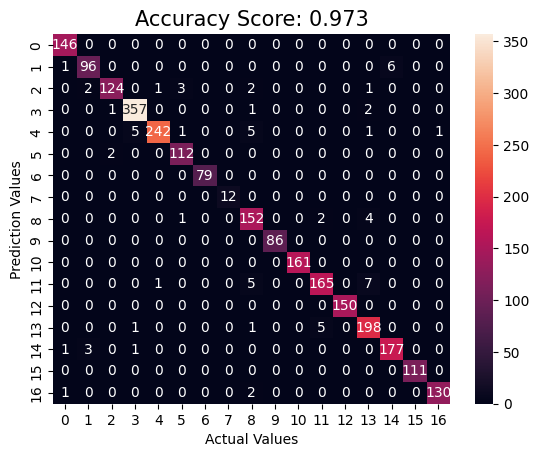

******************************
 
MNB ConfusionMatrix


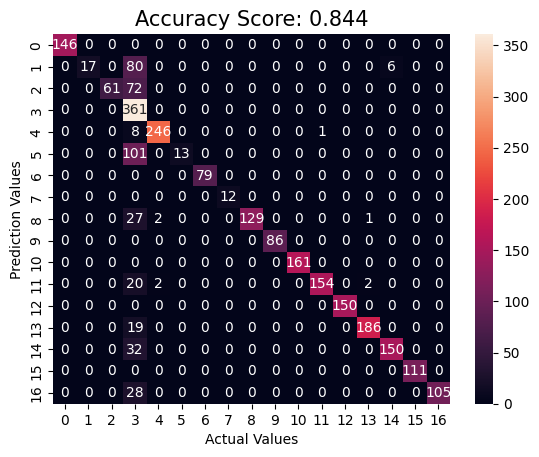

******************************
 


In [29]:
for name in models:
    print(f'{name} ConfusionMatrix')
    predictions= models.get(name).predict(X_test)
    score = round(accuracy_score(y_test, models.get(name).predict(X_test)), 3)
    confusionMatrix = CM(y_test, models.get(name).predict(X_test))
    sns.heatmap(confusionMatrix, annot=True, fmt=".0f")
    plt.xlabel('Actual Values')
    plt.ylabel('Prediction Values')
    plt.title('Accuracy Score: {0}'.format(score), size = 15)
    plt.show()
    print("******************************")
    print(" ")

#### Saving Model

In [30]:
'''import pickle
save_model = open('model.pkl','wb')
pickle.dump(model,save_model)
save_model.close()'''

"import pickle\nsave_model = open('model.pkl','wb')\npickle.dump(model,save_model)\nsave_model.close()"

In [32]:
import pickle
model = './model.pkl'
with open(model, "rb") as file_obj:
    obj = pickle.load(file_obj)


In [36]:
obj

MultinomialNB()

#### Perform Predictions

In [37]:
def prediction(text):
    x = TF_IDF.transform([text]).toarray()
    print(x.shape)
    lang= obj.predict(x)
    lang= encoder.inverse_transform(lang)
    print("This word/sentence contains {} word(s).".format(lang[0]))

In [38]:
prediction("My Name is Satya Thakur")

(1, 57905)
This word/sentence contains English word(s).


In [ ]:
prediction("ನಾ ಚಲೋ ಅದೀನಿ, ನೀವು ಹ್ಯಾಂಗದೀರ್’ರಿ?")

In [ ]:
prediction("Comment puis-je vous aider?")

In [ ]:
prediction("Μια μπύρα/έναν καφέ/ένα τσάι/ ένα σφηνάκι, παρακαλώ")

In [ ]:
prediction("चैट-जीपीटी क्रांति लाया")

In [ ]:
prediction("No hablo español")